In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:55<00:00, 20.6MB/s]
100% 1.06G/1.06G [00:56<00:00, 20.4MB/s]


In [3]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [7]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [49]:
# Create CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_9 (Bat  (None, 256, 256, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_10 (Ba  (None, 128, 128, 32)      128       
 tchNormalization)                                               
                                                      

In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
history = model.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
625/625 [==============================] - 55s 87ms/step - loss: 0.6683 - accuracy: 0.5914 - val_loss: 0.6248 - val_accuracy: 0.6384
Epoch 2/20
625/625 [==============================] - 51s 82ms/step - loss: 0.6050 - accuracy: 0.6629 - val_loss: 0.5826 - val_accuracy: 0.6970
Epoch 3/20
625/625 [==============================] - 55s 88ms/step - loss: 0.5344 - accuracy: 0.7158 - val_loss: 0.5388 - val_accuracy: 0.7246
Epoch 4/20
625/625 [==============================] - 51s 82ms/step - loss: 0.4815 - accuracy: 0.7527 - val_loss: 0.5313 - val_accuracy: 0.7364
Epoch 5/20
625/625 [==============================] - 53s 84ms/step - loss: 0.4365 - accuracy: 0.7832 - val_loss: 0.4441 - val_accuracy: 0.7986
Epoch 6/20
625/625 [==============================] - 55s 88ms/step - loss: 0.3906 - accuracy: 0.8095 - val_loss: 0.4307 - val_accuracy: 0.7992
Epoch 7/20
625/625 [==============================] - 54s 87ms/step - loss: 0.3545 - accuracy: 0.8311 - val_loss: 0.5243 - val_accuracy:

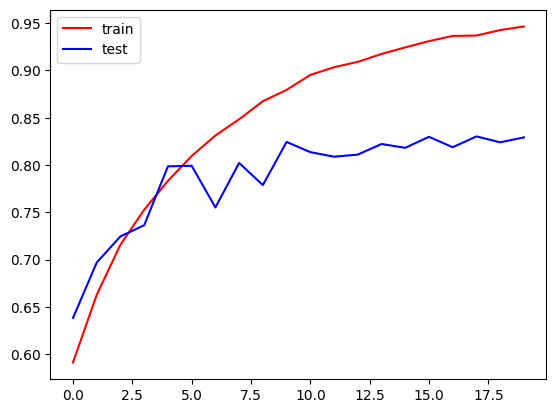

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

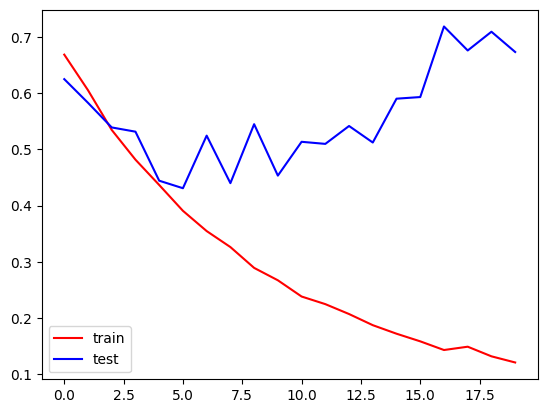

In [55]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='test')
plt.legend()
plt.show()

In [56]:
import cv2

In [78]:
img_dog = cv2.imread('/content/dog.jpg')

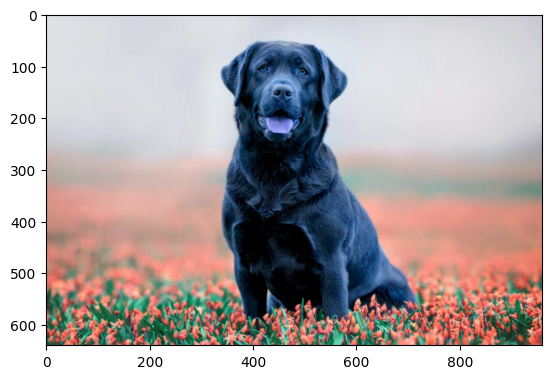

In [79]:
plt.imshow(img_dog)

In [80]:
img_dog.shape

(640, 960, 3)

In [81]:
img_dog = cv2.resize(img_dog,(256,256))

In [82]:
test_img_dog = img_dog.reshape((1,256,256,3))

In [83]:
model.predict(test_img_dog)

1/1 [==============================] - 0s 24ms/step


array([[1.]], dtype=float32)

In [84]:
img_cat = cv2.imread('/content/cat.jpg')

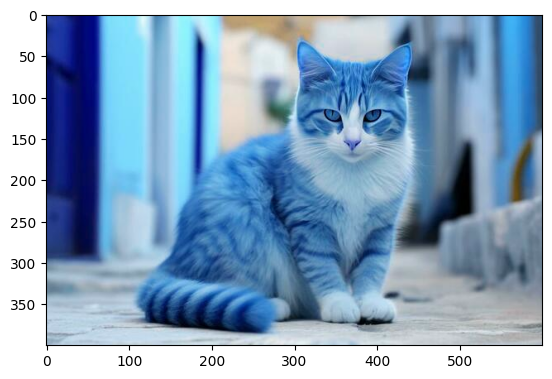

In [85]:
plt.imshow(img_cat)

In [86]:
img_cat.shape

(400, 600, 3)

In [87]:
img_cat = cv2.resize(img_cat, (256,256))

In [88]:
test_img_cat = img_cat.reshape((1,256,256,3))

In [89]:
model.predict(test_img_cat)

1/1 [==============================] - 0s 86ms/step


array([[0.]], dtype=float32)